<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/FeedForwardNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#librairy:
import pandas as pd # used to manipulate the data 
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

In [74]:
#loading the data in a dataframe

data = pd.read_csv('data_ffnn_3classes.txt', sep=" ", header=None)

In [75]:
data.columns = ['feature1','feature2','target']
data.head(10)

,feature1,feature2,target
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0
5,4.0150,3.1937,1.0
6,3.3814,3.4291,1.0
7,3.9113,4.1761,1.0
8,2.7822,4.0431,1.0
9,2.5518,4.6162,1.0


In [76]:
#variable definition: first we will take the exercice values then we will generalize our function once it is working

##############################
#
#N = number of feature = 2
N = 2
#
#I = data size = 71
I = 71
#
#J = output dimension = 3
J = 3
#
#K = number of hidden neuron = how many we want
K =5

#############################
#target matrix: data['target'] is actually our target matrix
#in order to compute the SSE with our estimation we have to transform it into an array of the same shape
#In order to do that we will use dummy variable and more precisely the get_dummies from pandas librairy

y = pd.get_dummies(data['target']).to_numpy()

#############################
#feature matrix:
X = data[['feature1','feature2']].to_numpy()



In [77]:
#forward propagation function:
def forwardprop(X,N,I,J,K,W,V):

####################################
#bias matrix
#dimension I*1
  B = np.ones(((X.T).shape[1],1))

#############################
# X completed with the bias
# dimension: I*N+1
  X_b = np.concatenate((B,X),axis = 1)

#############################
# X_b  computed with the hidden neurons = X_bv
# dimension I*K
  X_bv = np.matmul(X_b,V)

#############################
# define sigmoid of X_bv 
# dimension : I*K
  F = 1 / (1 + exp(-X_bv))

#############################
# complete our F with new bias which is still equal to one in our project
#dimension :
  F_b = np.concatenate((B,F),axis = 1)

#############################
# F_b computed with the hidden weight W
# dimension : I*J
  F_bw = np.matmul(F_b,W)

  #X I*N #B I*1 #X_b I*N+1 #X_bv I*K #F_b I*K+1 #F_bv I*J #G I*J
############################
# G after F_bw has been imputed to the sigmoid
# dimension : I*J
  G  = 1.0 / (1.0 + exp(-F_bw))

############################################
#backpropagation:
  return [X_b,F,F_b,G]

In [78]:
#Sum of square error SSE:
#found this method on SO
def SSE(A,B):
 # E = 0.5*(((A-B)).sum())**
  E = 1 / 2 * np.sum((A - B)**2)
  return E


In [79]:
#########################
#we can't compute our G with our label y yet as they don't have the same shape
#let's use dummy variable to create a new y

In [80]:
#backpropagation function:
def backprop(W,V,y,G,X_b,F,F_b,alpha1,alpha2):
  
  for k in range(K+1):
    for j in range(J):
      W[k][j] = W[k][j] - alpha1*((G[:,j]-y[:,j])*G[:,j]*(np.ones(G.shape)[:,j]-G[:,j])*F_b[:,k]).sum(axis =0)





#############################################w
  for k in range (K):
    for f in range(N+1):
      s=0
      for j in range(J):    
        s = s + ((G[:,j] - y[:,j]) * G[:,j] * (1-G[:,j])) * W[k+1,j] * F[:,k] * (1 - F[:,k]) * X_b[:,f]
      V[f,k]= V[f,k]- alpha2* np.sum(s)

  return [W,V]
#############################################

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
error 0.8611178430578987
error 0.8609727011756522
error 0.8608276175828034
error 0.8606825922394801
error 0.860537625105845
error 0.8603927161420992
error 0.8602478653084797
error 0.8601030725652614
error 0.8599583378727589
error 0.85981366119132
error 0.8596690424813318
error 0.8595244817032157
error 0.8593799788174363
error 0.8592355337844877
error 0.859091146564906
error 0.85894681711926
error 0.8588025454081595
error 0.8586583313922495
error 0.8585141750322108
error 0.85837007628876
error 0.8582260351226545
error 0.8580820514946838
error 0.8579381253656755
error 0.8577942566964938
error 0.8576504454480409
error 0.857506691581253
error 0.8573629950571038
error 0.8572193558366025
error 0.8570757738807946
error 0.8569322491507648
error 0.8567887816076294
error 0.8566453712125446
error 0.8565020179267
error 0.856358721711322
error 0.8562154825276738
error 0.8560723003370561
error 0.8559291751008009
error 0.85

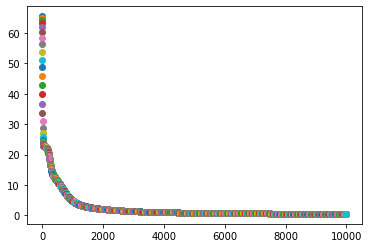

In [87]:
#FFNN function:



#############################
# W and V matrix: we will initialize them to random value between 0 and 1 time 0.1 
# i have read that it is useful to multiply them by a small coefficient, so we will start with that.
# it seem they are some kind of neurons so their dimension has to be number of feature + 1 (for the bias) x K
# with K being the number of hidden neuron i want
# We will set it to 5 as of now
V = np.random.rand(N+1,K) 

W = np.random.rand(K+1,J) 


for i in range (10000):
  X_b,F,F_b,G = forwardprop(X,2,71,3,5,W,V)
  W,V = backprop(W,V,y,G,X_b,F,F_b,0.01,0.01)
  plt.scatter(i,SSE(y,G))
  print("error", SSE(y,G))
plt.show()

In [88]:
#data visualisation:
print("here is our estimation")
print(G)
print("here is the true data")
print(y)

here is our estimation
[[5.76982526e-03 9.97501079e-01 5.43703900e-03]
 [1.88641007e-02 9.89976082e-01 6.15462313e-03]
 [4.48575762e-03 9.98209843e-01 4.96961513e-03]
 [2.37841564e-02 9.86705661e-01 6.19415739e-03]
 [8.87031359e-02 6.65440766e-01 2.87203162e-02]
 [3.02803250e-03 9.86715796e-01 3.40545541e-02]
 [1.71650410e-02 9.88982262e-01 7.01108767e-03]
 [4.13793642e-03 9.98213287e-01 5.29663084e-03]
 [7.54673777e-03 9.96548152e-01 5.64182325e-03]
 [4.79168627e-03 9.98044152e-01 5.10085222e-03]
 [6.37609789e-03 9.97076608e-01 5.62861373e-03]
 [2.29168852e-01 7.84537120e-01 7.41332118e-03]
 [1.53020618e-02 9.92031660e-01 6.18970562e-03]
 [6.41212472e-03 9.97158450e-01 5.53798668e-03]
 [5.09398384e-02 9.69210527e-01 6.20099584e-03]
 [4.95405622e-03 9.97948591e-01 5.15549507e-03]
 [5.48325188e-03 9.97364452e-01 5.85070596e-03]
 [4.90544735e-03 9.94385674e-01 1.18622541e-02]
 [2.71184760e-02 9.58172776e-01 1.33547817e-02]
 [6.20222740e-02 9.58183517e-01 6.55584585e-03]
 [8.00934045e-01 

In [ ]:
#result:


[[ 0.73875896 -4.03058038  2.48750005 -1.60550742  1.23404161]
 [ 2.92674379  5.24251483 -0.18015731  1.57286932  1.18207048]] [[-8.43918615  8.67080327 -0.42355424]
 [ 6.24493598  1.77368932 -7.98618739]
 [-5.12133308  4.44855453  1.59757651]
 [-4.35770271  3.06186222  0.21759512]
 [ 0.59877056 -4.13745701  1.07445318]]
[[-11.32500976   2.2499708   -5.99564924  -4.63143932   0.92963633]] [[ 0.42578802 -4.50802833  1.72059993]]
[[0.04020778 0.9622902  0.00485506]]  ==  1
[[0.17004715 0.86689272 0.0060279 ]]  ==  1
[[0.00843972 0.99210921 0.01035567]]  ==  1
[[0.06036711 0.94526409 0.01141677]]  ==  1
[[0.20869471 0.67934315 0.03078775]]  ==  1
[[0.01471852 0.97493385 0.02933642]]  ==  1
[[0.02478183 0.97463893 0.01576586]]  ==  1
[[0.00269374 0.99721193 0.01662235]]  ==  1
[[0.02552114 0.97827762 0.00906552]]  ==  1
[[0.02183201 0.98069817 0.00699105]]  ==  1
[[0.00671326 0.9934161  0.0142954 ]]  ==  1
[[0.3047296  0.68753437 0.01547335]]  ==  1
[[0.15889453 0.87156417 0.00487389]]  ==

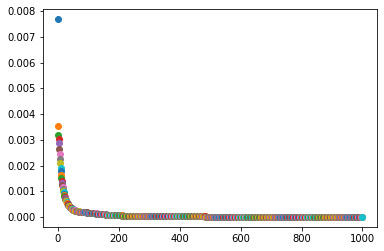

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random

class NeuralNetwork:
  def __init__(self):
    """
      Learning rate (alpha), weights and biases for the neural network.
    """
    self.w1 = np.random.rand(2, 5)
    self.b1 = np.random.rand(1, 5)
    self.w2 = np.random.rand(5, 3)
    self.b2 = np.random.rand(1, 3)
    self.alpha = 0.1

  def evaluate(self, x):
    h = sigmoid(np.dot(x, self.w1) + self.b1)
    return sigmoid(np.dot(h, self.w2) + self.b2)

  def train(self, training_input, training_output, alpha, iterations, plt):
    for i in range(iterations):
      err = 0
      for x, y in zip(training_input, training_output):
        h1 = sigmoid(np.dot(x, self.w1) + self.b1)
        y_train = sigmoid(np.dot(h1, self.w2) + self.b2)
        j = 1 / 2 * np.sum((y - y_train)**2)
        delta_b2 = (y_train - y) * grad_sigmoid(np.dot(h1, self.w2) + self.b2)
        delta_w2 = np.dot(h1.T, delta_b2)
        delta_b1 = np.dot(delta_b2, self.w2.T * grad_sigmoid(np.dot(x, self.w1) + self.b1))
        delta_w1 = np.dot(x.T, delta_b1)
        self.w1 = self.w1 - delta_w1 * alpha
        self.b1 = self.b1 - delta_b1 * alpha
        self.b2 = self.b2 - delta_b2 * alpha
        self.w2 = self.w2 - delta_w2 * alpha
        err = err + j
        err = err / len(training_input)
      plt.scatter(i, err)
    print(self.w1, self.w2)
    print(self.b1, self.b2)

  def test(self, x1, x2):
    arr = np.array([x1, x2])
    return self.evaluate(arr)

def sigmoid(x):
	return 1.0 / (1.0 + np.exp(-x))

def grad_sigmoid(x):
	return sigmoid(x) * (1.0 - sigmoid(x))

def convert_to_int(x):
  if x[0][0] > 0.66:
    return 0
  if x[0][1] > 0.66:
    return 1
  return 2

def to_vect(y):
	a = np.zeros(3)
	a[y] = 1
	return a

if __name__ == '__main__':
  # Load data from file
  fic = open("data_ffnn_3classes.txt", "r")
  data = np.loadtxt(fic)
  fic.close()

  # Input data matrix
  training_input = [np.reshape(x, (1, 2)) for x in data[:,:2].astype(float)]

  # Output matrix
  training_output = np.array([to_vect(y) for y in np.array(data[:,2]).T.astype(int)])

  # Create and train neural network
  net = NeuralNetwork()
  net.train(training_input, training_output, 0.1, 1000, plt)

  # Verify neural network for input data
  sucess = 0
  for i in range(0, len(training_input)):
    x = net.evaluate(training_input[i])
    print(x, " == ", str(convert_to_int([training_output[i]])))
    if convert_to_int(x) == convert_to_int([training_output[i]]):
      sucess+=1
  print(sucess // len(training_input))

  # Test network with new data
  tmp = net.test(2, 2)
  print(tmp, " = ", str(convert_to_int(tmp)))
  tmp = net.test(4, 4)
  print(tmp, " = ", str(convert_to_int(tmp)))
  tmp = net.test(4.5, 1.5)
  print(tmp, " = ", str(convert_to_int(tmp)))

  plt.show()

-2
